# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | queenstown
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | keflavik
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | richards bay
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | carutapera
Processing Record 15 of Set 1 | general conesa
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | tubmanburg
Processing Record 18 of Set 1 | crucecita
Processing Record 19 of Set 1 | kalemie
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | port elizabet

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,queenstown,-31.8976,26.8753,11.72,84,40,2.53,ZA,1725488424
1,edinburgh of the seven seas,-37.0676,-12.3116,10.34,64,83,6.39,SH,1725489241
2,puerto natales,-51.7236,-72.4875,9.25,43,20,17.49,CL,1725489158
3,waitangi,-43.9535,-176.5597,9.90,69,6,3.13,NZ,1725489154
4,bethel,41.3712,-73.4140,22.46,66,0,1.78,US,1725489183


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,11.72,84,40,2.53,ZA,1725488424
1,edinburgh of the seven seas,-37.0676,-12.3116,10.34,64,83,6.39,SH,1725489241
2,puerto natales,-51.7236,-72.4875,9.25,43,20,17.49,CL,1725489158
3,waitangi,-43.9535,-176.5597,9.90,69,6,3.13,NZ,1725489154
4,bethel,41.3712,-73.4140,22.46,66,0,1.78,US,1725489183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

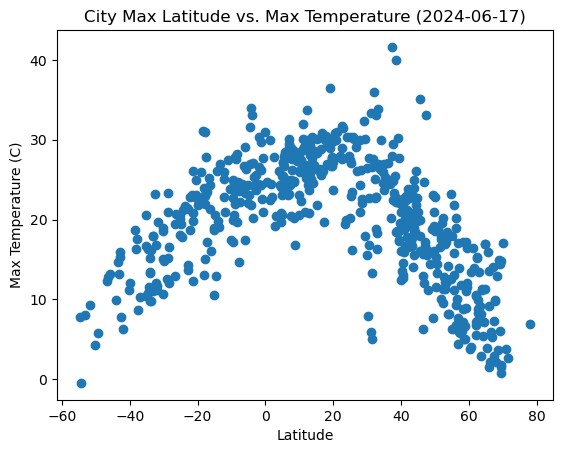

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

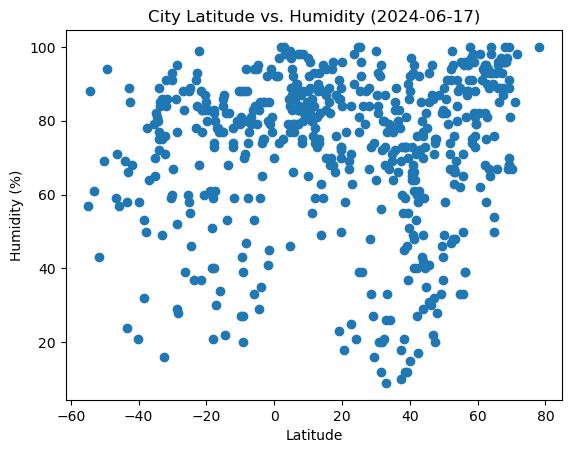

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

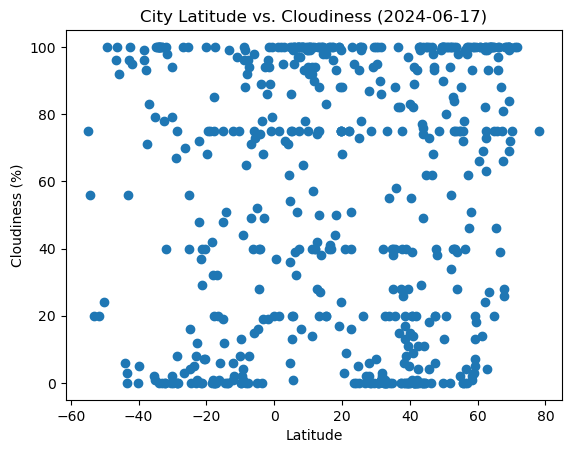

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

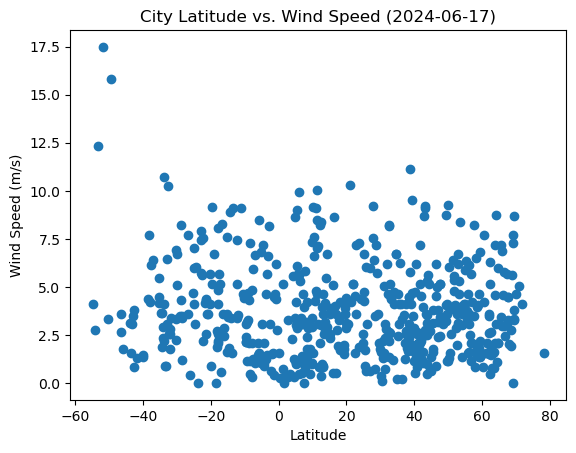

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bethel,41.3712,-73.4140,22.46,66,0,1.78,US,1725489183
6,keflavik,64.0049,-22.5624,11.24,100,100,8.75,IS,1725489246
9,ilulissat,69.2167,-51.1000,6.01,100,100,0.00,GL,1725489250
15,tubmanburg,6.8708,-10.8172,23.15,98,100,1.42,LR,1725489257
21,hamilton,39.1834,-84.5333,30.21,46,0,4.12,US,1725489240


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,11.72,84,40,2.53,ZA,1725488424
1,edinburgh of the seven seas,-37.0676,-12.3116,10.34,64,83,6.39,SH,1725489241
2,puerto natales,-51.7236,-72.4875,9.25,43,20,17.49,CL,1725489158
3,waitangi,-43.9535,-176.5597,9.90,69,6,3.13,NZ,1725489154
5,bredasdorp,-34.5322,20.0403,10.84,81,100,1.88,ZA,1725489245


###  Temperature vs. Latitude Linear Regression Plot

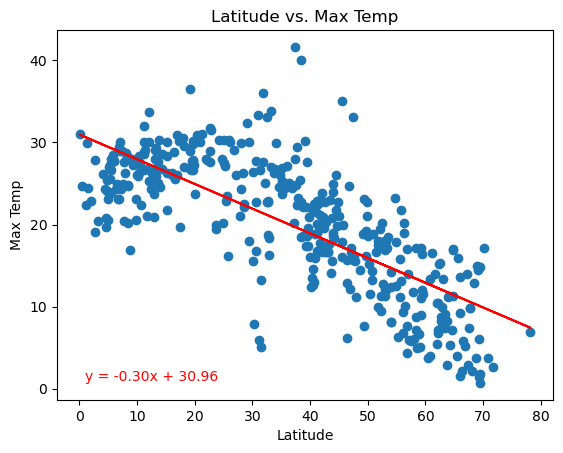

 The r^2 value is: 0.5611680296939439


In [61]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show plot
r_squared = r_value * r_value
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')


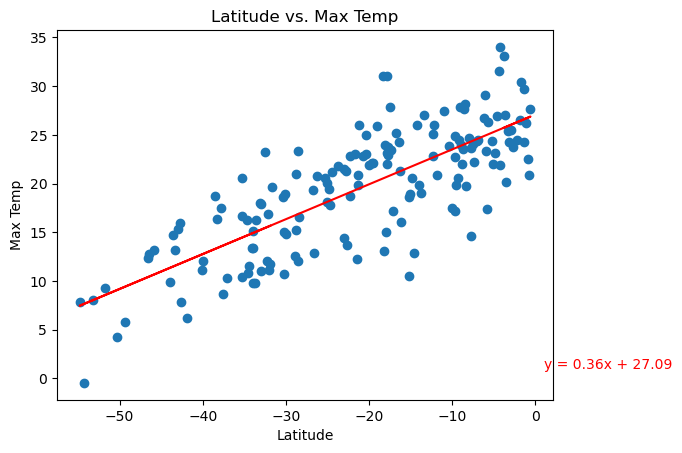

 The r^2 value is: 0.6065813457745493
Disscussion about the linear relationship:
For the northern hemisphere data, there is a negative linear relationship. As latitude increases, temp decreases.
For southern hemisphere data, there is a positive linear relationship. As latitude increases, temp also increases.


In [60]:
# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show plot
r_squared = r_value * r_value
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')

print("Disscussion about the linear relationship:")
print("For the northern hemisphere data, there is a negative linear relationship. As latitude increases, temp decreases.")
print("For southern hemisphere data, there is a positive linear relationship. As latitude increases, temp also increases.")

### Humidity vs. Latitude Linear Regression Plot

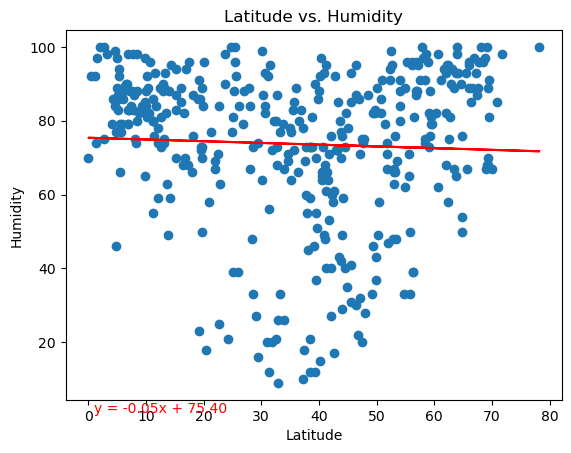

 The r^2 value is: 0.0019523488430323171


In [59]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
r_squared = r_value * r_value
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')


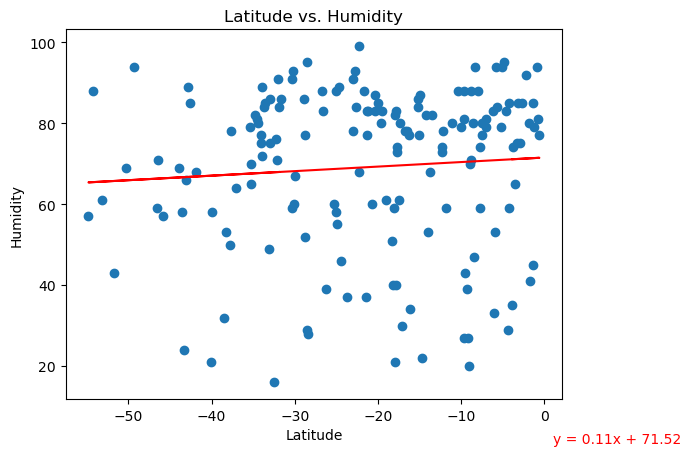

 The r^2 value is: 0.005929910105926639
Disscussion about the linear relationship:
For both the northern and southern hemisphere data points, there is no significant correlation between latitude and humidity


In [64]:
# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
r_squared = r_value * r_value
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')

print("Disscussion about the linear relationship:")
print("For both the northern and southern hemisphere data points, there is no significant correlation between latitude and humidity")



### Cloudiness vs. Latitude Linear Regression Plot

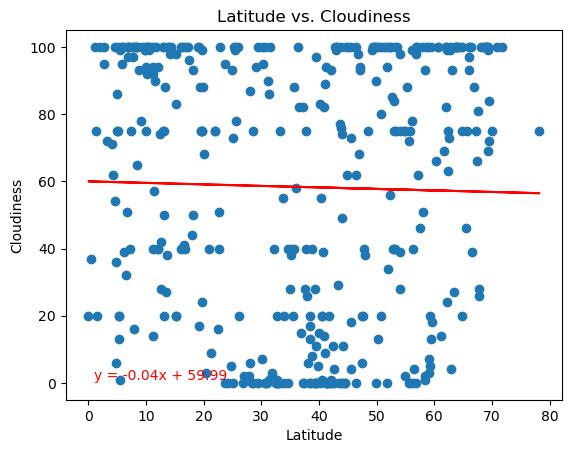

 The r^2 value is: 0.0005375325293391027


In [65]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show plot
r_squared = r_value * r_value
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')

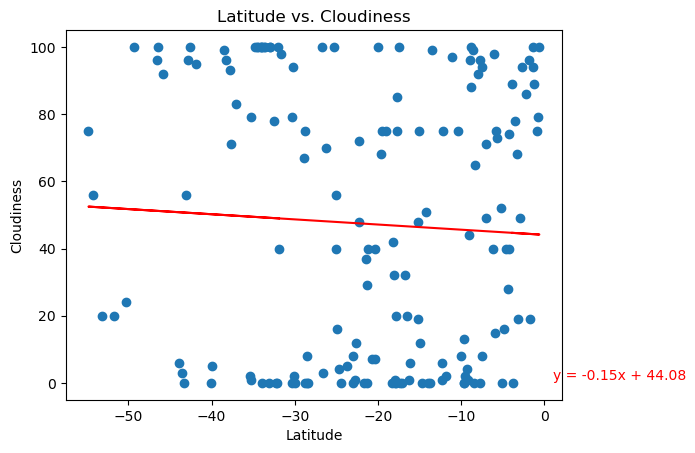

 The r^2 value is: 0.002788282951848735
For both the northern and southern hemisphere data points, there is no significant correlation between latitude and cloudiness


In [66]:
# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show plot
r_squared = r_value * r_value
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')
print("For both the northern and southern hemisphere data points, there is no significant correlation between latitude and cloudiness")

### Wind Speed vs. Latitude Linear Regression Plot

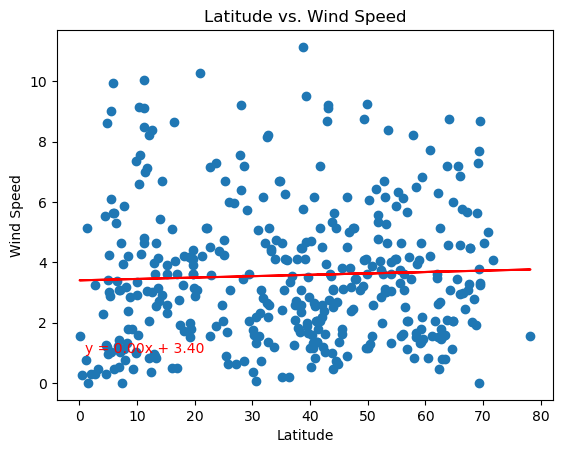

 The r^2 value is: 0.0016174023796461656


In [67]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show plot
r_squared = r_value * r_value
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')

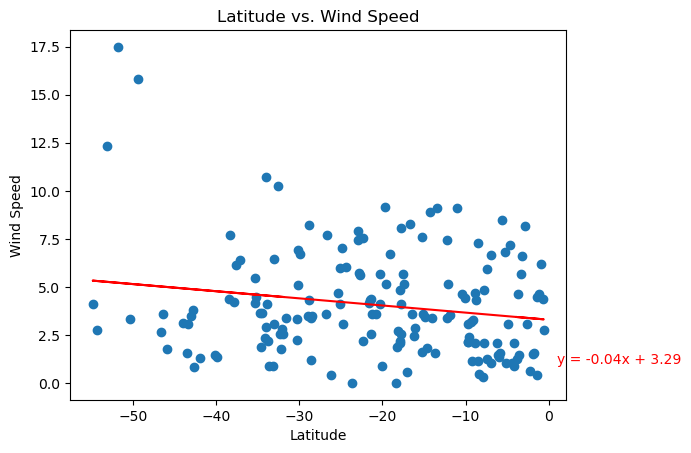

 The r^2 value is: 0.03280786911361711
For both the northern and southern hemisphere data points, there is no significant correlation between latitude and wind speed


In [68]:
# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line_eq = (f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Show plot
r_squared = r_value * r_value
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red')
plt.text(x=1, y=1, s=line_eq, color='red')
plt.show()

print(f' The r^2 value is: {r_squared}')
print("For both the northern and southern hemisphere data points, there is no significant correlation between latitude and wind speed")